In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df = df.rename(columns={'RegionName': 'zipcode'})

In [5]:
df['zipcode'] = df['zipcode'].astype(str).str.zfill(5)

In [6]:
df['five_year'] = ((df['2018-04']/df['2013-04'])-1)*100

In [7]:
df.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,26.082701
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,53.384175
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,28.315830
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,25.878840
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,7.048458


In [8]:
df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(20)

,zipcode,City,State,five_year
7302,80216,Denver,CO,173.872951
1477,94601,Oakland,CA,167.943262
5830,48240,Redford,MI,161.224490
1239,94590,Vallejo,CA,159.379310
2661,33705,Saint Petersburg,FL,159.210526
6105,37210,Nashville,TN,155.932203
2627,33460,Lake Worth,FL,153.647059
6563,15201,Pittsburgh,PA,147.593583
475,11216,New York,NY,147.591761
1835,37207,Nashville,TN,146.683047


In [9]:
lake_worth = df.loc[df['zipcode'] == '37210']

In [10]:
lake_worth.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
6105,74241,37210,Nashville,TN,Nashville,Davidson,6106,60800.0,61000.0,61200.0,...,204600,207700,211100,214500,217200,219300,221500,224300,226500,155.932203


In [11]:
lake_worth = lake_worth.iloc[:,7:-1]

In [12]:
lake_worth.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6105,60800.0,61000.0,61200.0,61300.0,61500.0,61700.0,61900.0,62100.0,62400.0,62700.0,...,201200,204600,207700,211100,214500,217200,219300,221500,224300,226500


In [13]:
lake_worth = lake_worth.T

In [14]:
lake_worth.head()

,6105
1996-04,60800.0
1996-05,61000.0
1996-06,61200.0
1996-07,61300.0
1996-08,61500.0


In [15]:
type(lake_worth)

pandas.core.frame.DataFrame

In [16]:
lake_worth = lake_worth.rename(columns={6105:'home price'})

In [17]:
lake_worth.head()

,home price
1996-04,60800.0
1996-05,61000.0
1996-06,61200.0
1996-07,61300.0
1996-08,61500.0


In [18]:
lake_worth.index = lake_worth.index.astype('datetime64[ns]')

In [19]:
lake_worth.index.dtype

dtype('<M8[ns]')

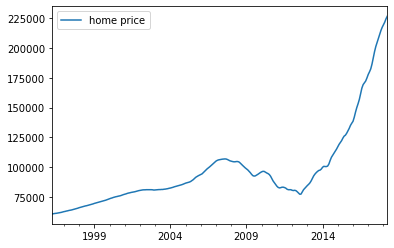

In [20]:
lake_worth.plot();

In [21]:
lake_worth['diff'] = lake_worth.diff()

In [22]:
lake_worth.head()

,home price,diff
1996-04-01,60800.0,NaN
1996-05-01,61000.0,200.0
1996-06-01,61200.0,200.0
1996-07-01,61300.0,100.0
1996-08-01,61500.0,200.0


In [23]:
lake_worth['home price shifted'] = lake_worth['home price'].shift()

In [24]:
lake_worth.tail()

,home price,diff,home price shifted
2017-12-01,217200.0,2700.0,214500.0
2018-01-01,219300.0,2100.0,217200.0
2018-02-01,221500.0,2200.0,219300.0
2018-03-01,224300.0,2800.0,221500.0
2018-04-01,226500.0,2200.0,224300.0


In [25]:
lake_worth['pct'] = lake_worth['diff']/lake_worth['home price shifted']

In [26]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-04-01,60800.0,NaN,NaN,NaN
1996-05-01,61000.0,200.0,60800.0,0.003289
1996-06-01,61200.0,200.0,61000.0,0.003279
1996-07-01,61300.0,100.0,61200.0,0.001634
1996-08-01,61500.0,200.0,61300.0,0.003263


In [27]:
lake_worth = lake_worth.dropna()

In [28]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-05-01,61000.0,200.0,60800.0,0.003289
1996-06-01,61200.0,200.0,61000.0,0.003279
1996-07-01,61300.0,100.0,61200.0,0.001634
1996-08-01,61500.0,200.0,61300.0,0.003263
1996-09-01,61700.0,200.0,61500.0,0.003252


In [29]:
lake_worth_pct = lake_worth.drop(['pct','diff','home price shifted'],axis=1)

In [30]:
lake_worth_pct.head()

,home price
1996-05-01,61000.0
1996-06-01,61200.0
1996-07-01,61300.0
1996-08-01,61500.0
1996-09-01,61700.0


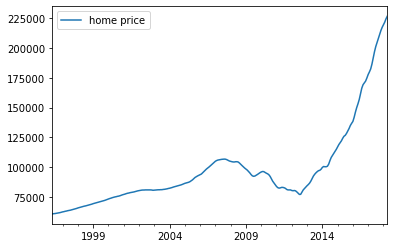

In [31]:
lake_worth_pct.plot();

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
adfuller(lake_worth_pct)

(-0.7457792066110125,
 0.8345327875288113,
 15,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 3543.7353873352918)

In [34]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [35]:
cutoff = '2013-05'
train = lake_worth_pct[:cutoff]
test = lake_worth_pct[cutoff:]

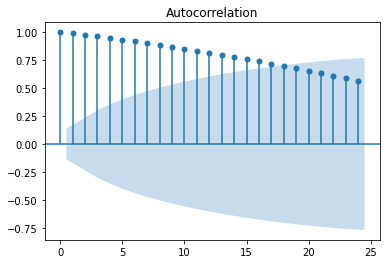

In [36]:
#Plot_acf is used to identify the q parameter
plot_acf(train);

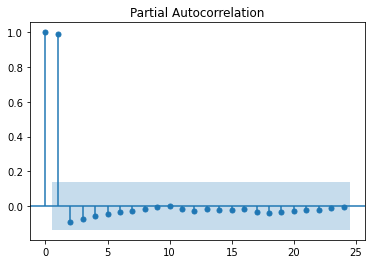

In [37]:
plot_pacf(train,method='ywm');

In [48]:
ar_1 = ARIMA(train, order=(1, 2, 2)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred = ar_1.predict()

/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(train, train_pred))

4802.123825058128

In [50]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             home price   No. Observations:                  205
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1395.009
Date:                Thu, 30 Mar 2023   AIC                           2798.018
Time:                        16:50:54   BIC                           2811.271
Sample:                    05-01-1996   HQIC                          2803.379
                         - 05-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7778      0.118      6.611      0.000       0.547       1.008
ma.L1         -0.4322      0.131     -3.311      0.001      -0.688      -0.176
ma.L2         -0.3859      0.047     -8.267      0.000      -0.477      -0.294
sigma2      4.626e+04   2500.859     18.497      0.000    4.14e+04    5.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.80   Jarque-Bera (JB):               615.86
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               7.23   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
y_pred = ar_1.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ar_1.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

In [52]:
np.sqrt(mean_squared_error(test, y_pred_out))

16561.726719220558

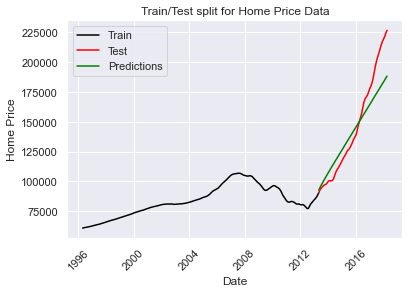

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "red",label='Test')
plt.ylabel('Home Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Home Price Data")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();

Forecasted percent return in 2019: 34.47%
Forecasted percent return in 2021: 47.58%
Forecasted percent return in 2023: 60.69%


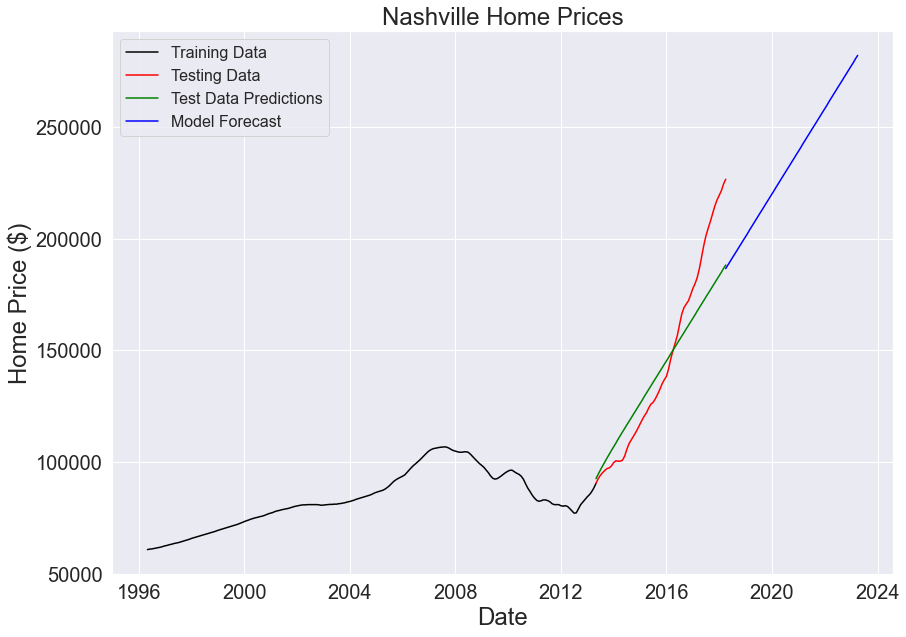

In [54]:
output = ar_1.predict(start='2018-04-01',end='2023-04-01')

import seaborn as sns
sns.set(font_scale = 1)

plt.figure(figsize=(14,10))
plt.plot(train, color = "black",label='Training Data')
plt.plot(test, color = "red",label='Testing Data')
plt.ylabel('Home Price ($)', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Nashville Home Prices", fontsize=24)
plt.plot(y_pred_out, color='green', label = 'Test Data Predictions')
plt.plot(output, color='blue', label = 'Model Forecast')
plt.legend(fontsize=16);

pred1 = (np.mean(output[:12]))
pred3 = (np.mean(output[:36]))
pred5 = (np.mean(output[:60]))
actual = test['home price'].mean()
change1 = ((pred1-actual)/actual) * 100
change3 = ((pred3-actual)/actual) * 100
change5 = ((pred5-actual)/actual) * 100

print(f'Forecasted percent return in 2019: {round(change1, 2)}%')
print(f'Forecasted percent return in 2021: {round(change3, 2)}%')
print(f'Forecasted percent return in 2023: {round(change5, 2)}%')